# Time Series Removing Trends And Decomposition

This file contains trend removal and decomposition methods with stock prices

In [1]:
import pandas as pd
from datetime import date
from datetime import timedelta
import plotly.graph_objects as go

import requests
import json
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as ticker

import numpy as np
from IPython.display import clear_output
import time
# Set plot space as inline for inline plots and qt for external plots
%matplotlib inline

In [2]:
import platform
print(platform.python_version())

3.8.3


In [3]:
# Obtain the API credentials from an external hidden file

from passwords import api_key

In [4]:
# A function to obtain price history

#Utilizing "UniBit API" by Vincent Jiang
#Site: https://unibit.ai/product

#Errors may occur if credits run out, add an error code check to this function

def retrieve_ticker_price_info(ticker, start_date, end_date = False):
    
    # Obtain today's date
    today = date.today()
    
    # A condition to set the end date to today if there is no end date given
    if not end_date:
        end_date = today
    
    
    url = 'https://api.unibit.ai/v2/stock/historical/?tickers={}&interval=1&startDate={}&endDate={}&selectedFields=all&dataType=json&accessKey={}'.format(ticker, start_date, end_date, api_key)
    
    response = requests.get(url)
    
    if response.status_code != 200:
        print("The response status code is: " + str(response.status_code))
        return None
    
    return response.json()
    

In [5]:
def retrieve_price_history_dataframe(ticker, ticker_price_history):
    
    data_frame = pd.DataFrame(ticker_price_history['result_data'][ticker])
    
    # Set the index to the 'date' column
    data_frame.set_index('date', inplace = True)
    
    data_frame.sort_index(inplace=True)
    
    return data_frame

In [6]:
today = date.today()
a_year_ago = str(date.today() - timedelta(days=1*365))
five_years_ago = str(date.today() - timedelta(days=5*365))

In [7]:
# A test of the above functions with the 'DKS' company ticker

# Obtain the price info
dks_info = retrieve_ticker_price_info('DKS', a_year_ago)

# Create and view the dataframe
dks_df = retrieve_price_history_dataframe('DKS', dks_info)
dks_df.head()

volume   high    low  adj_close  close   open
date                                                      
2019-07-08  2600900  37.08  36.35      36.91  36.91  36.59
2019-07-09  2589100  37.13  35.99      36.01  36.01  36.78
2019-07-10  1983300  36.22  34.99      35.90  35.90  36.19
2019-07-11  1469700  36.26  35.72      36.00  36.00  35.90
2019-07-12  1746900  37.46  36.07      37.21  37.21  36.07

In [8]:
dks_info['meta_data']['start_date']
dks_info['meta_data']['end_date']
list(dks_info['result_data'].keys())[0]

'DKS'

In [9]:
def print_ohlc(ticker_df, ticker_info):
    
    ticker_n = list(ticker_info['result_data'].keys())[0]
    start_date = ticker_info['meta_data']['start_date']
    end_date = ticker_info['meta_data']['end_date']

    
    
    fig = go.Figure(data=go.Ohlc(x=ticker_df.index,
                    open=ticker_df['open'],
                    high=ticker_df['high'],
                    low=ticker_df['low'],
                    close=ticker_df['close']))

    fig.update_layout(title_text='{} From {} to {}'.format(ticker_n, start_date, end_date),
                  title={
                    'y':0.9,
                    'x':0.5,
                    'xanchor': 'center',
                    'yanchor': 'top'},
                  xaxis_rangeslider_visible=True, xaxis_title="Time", yaxis_title="Price")
    
    fig.show()

In [10]:
print_ohlc(dks_df, dks_info)

# Obtain S&P 500 Index Values and Create Transformations

In [11]:
# The S&P 500 company ticker is ^GSPC

# Obtain the price info
inx_info = retrieve_ticker_price_info('^GSPC', a_year_ago)

# Create and view the dataframe
inx_df = retrieve_price_history_dataframe('^GSPC', inx_info)
inx_df.head()

volume     high      low  adj_close    close     open
date                                                                 
2019-07-08  2904550000  2980.76  2970.09    2975.95  2975.95  2979.77
2019-07-09  3028210000  2981.90  2963.44    2979.63  2979.63  2965.52
2019-07-10  3154240000  3002.98  2984.62    2993.07  2993.07  2989.30
2019-07-11  3154620000  3002.33  2988.80    2999.91  2999.91  2999.62
2019-07-12  2974960000  3013.92  3001.87    3013.77  3013.77  3003.36

In [12]:
# View the S&P 500
print_ohlc(inx_df, inx_info)

In [13]:
inx_df.head()

volume     high      low  adj_close    close     open
date                                                                 
2019-07-08  2904550000  2980.76  2970.09    2975.95  2975.95  2979.77
2019-07-09  3028210000  2981.90  2963.44    2979.63  2979.63  2965.52
2019-07-10  3154240000  3002.98  2984.62    2993.07  2993.07  2989.30
2019-07-11  3154620000  3002.33  2988.80    2999.91  2999.91  2999.62
2019-07-12  2974960000  3013.92  3001.87    3013.77  3013.77  3003.36

In [14]:
# Create transformation columns of the adjusted close price

# Source: https://docs.scipy.org/doc/numpy/reference/routines.math.html

# Calculate the log of the adjusted close prices
inx_df['adj_close_log'] = np.log(inx_df['adj_close'])

# Calculate the square root of the adjusted close prices
inx_df['adj_close_sqrt'] = np.sqrt(inx_df['adj_close'])

# Calculate the cubed root of the adjusted close prices
inx_df['adj_close_cbrt'] = np.cbrt(inx_df['adj_close'])



In [15]:
inx_df.head()

volume     high      low  adj_close    close     open  \
date                                                                    
2019-07-08  2904550000  2980.76  2970.09    2975.95  2975.95  2979.77   
2019-07-09  3028210000  2981.90  2963.44    2979.63  2979.63  2965.52   
2019-07-10  3154240000  3002.98  2984.62    2993.07  2993.07  2989.30   
2019-07-11  3154620000  3002.33  2988.80    2999.91  2999.91  2999.62   
2019-07-12  2974960000  3013.92  3001.87    3013.77  3013.77  3003.36   

            adj_close_log  adj_close_sqrt  adj_close_cbrt  
date                                                       
2019-07-08       7.998319       54.552269       14.383852  
2019-07-09       7.999554       54.585987       14.389779  
2019-07-10       8.004055       54.708957       14.411382  
2019-07-11       8.006338       54.771434       14.422351  
2019-07-12       8.010947       54.897814       14.444528

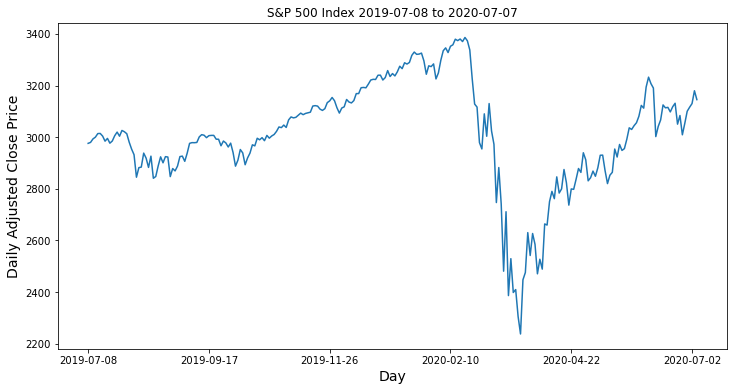

In [16]:
# Original Plot

inx_df['adj_close'].plot(figsize = (12,6))
plt.xlabel("Day", fontsize=14)
plt.ylabel("Daily Adjusted Close Price", fontsize=14)
plt.title('S&P 500 Index {} to {}'.format(a_year_ago, today))
plt.show()

In [17]:
from stationarity_check_funtion import *

In [18]:
#https://github.com/statsmodels/statsmodels/issues/6150
#!pip install git+https://github.com/statsmodels/statsmodels.git --upgrade

In [19]:
# There appears to be an ongiong issue with stats models

#!python -m pip install statsmodels # Don't install as a root, create an environment

from statsmodels.tsa.stattools import adfuller

In [20]:
# The original adjusted close series dickey fuller test
stationarity_check(inx_df['adj_close'])

Results of Dickey-Fuller Test:
Test Statistic                  -2.502433
p-value                          0.114884
#Lags Used                       9.000000
Number of Observations Used    243.000000
Critical Value (1%)             -3.457551
Critical Value (5%)             -2.873509
Critical Value (10%)            -2.573148
dtype: float64


# Removing Trends

## 1) Transformations

### A) Log Transformation

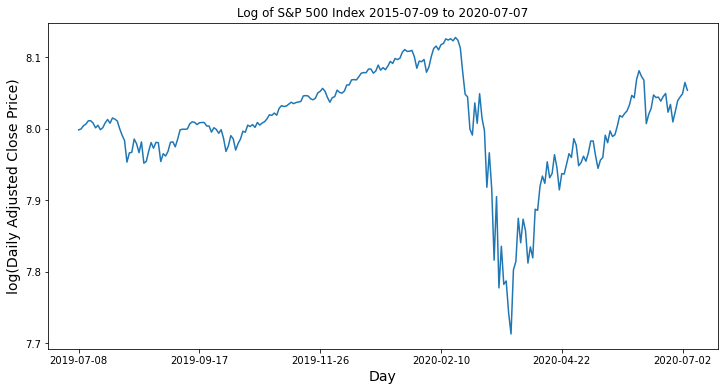

In [21]:
inx_df['adj_close_log'].plot(figsize = (12,6))
plt.xlabel("Day", fontsize=14)
plt.ylabel("log(Daily Adjusted Close Price)", fontsize=14)
plt.title('Log of S&P 500 Index {} to {}'.format(five_years_ago, today))
plt.show()

In [22]:
stationarity_check(inx_df['adj_close_log'])

Results of Dickey-Fuller Test:
Test Statistic                  -2.559464
p-value                          0.101668
#Lags Used                       9.000000
Number of Observations Used    243.000000
Critical Value (1%)             -3.457551
Critical Value (5%)             -2.873509
Critical Value (10%)            -2.573148
dtype: float64


### B) Square Root Transformation

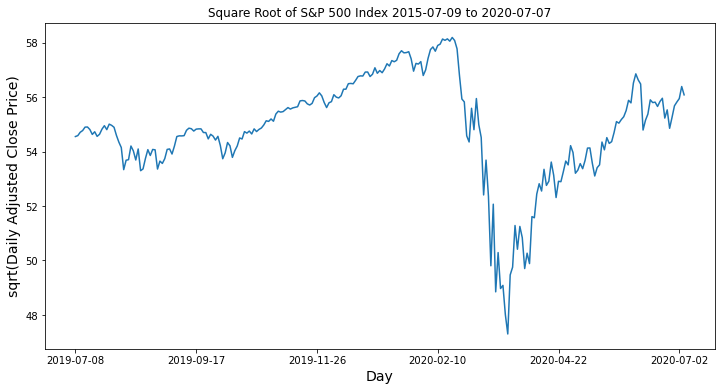

In [23]:
inx_df['adj_close_sqrt'].plot(figsize = (12,6))
plt.xlabel("Day", fontsize=14)
plt.ylabel("sqrt(Daily Adjusted Close Price)", fontsize=14)
plt.title('Square Root of S&P 500 Index {} to {}'.format(five_years_ago, today))
plt.show()

In [24]:
stationarity_check(inx_df['adj_close_sqrt'])

Results of Dickey-Fuller Test:
Test Statistic                  -2.531673
p-value                          0.107957
#Lags Used                       9.000000
Number of Observations Used    243.000000
Critical Value (1%)             -3.457551
Critical Value (5%)             -2.873509
Critical Value (10%)            -2.573148
dtype: float64


### C) Cubed Root Transformation

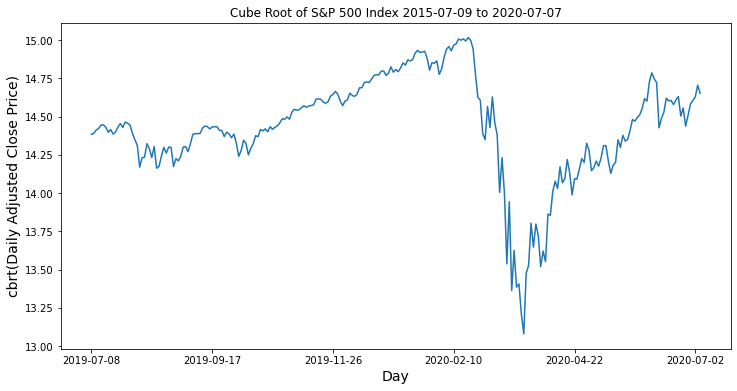

In [25]:
inx_df['adj_close_cbrt'].plot(figsize = (12,6))
plt.xlabel("Day", fontsize=14)
plt.ylabel("cbrt(Daily Adjusted Close Price)", fontsize=14)
plt.title('Cube Root of S&P 500 Index {} to {}'.format(five_years_ago, today))
plt.show()

In [26]:
stationarity_check(inx_df['adj_close_cbrt'])

Results of Dickey-Fuller Test:
Test Statistic                  -2.541112
p-value                          0.105789
#Lags Used                       9.000000
Number of Observations Used    243.000000
Critical Value (1%)             -3.457551
Critical Value (5%)             -2.873509
Critical Value (10%)            -2.573148
dtype: float64


## 2) Rolling Mean

NOTE: The lab removes the rolling mean after a transformation.

### A) Subtract the Rolling Mean

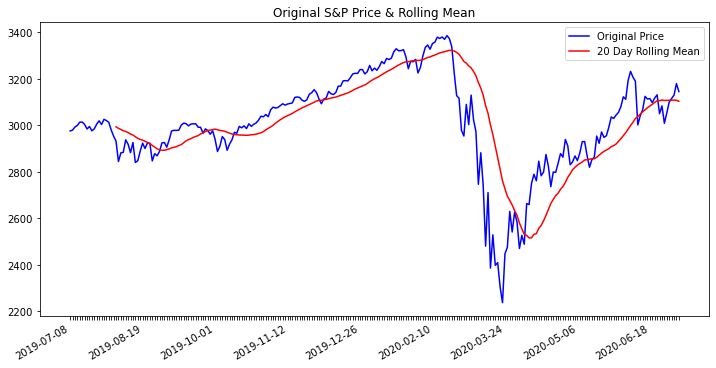

In [27]:
rolmean = inx_df['adj_close'].rolling(window = 20).mean()


fig, ax = plt.subplots(figsize=(12,6))

ax.plot(inx_df['adj_close'], color='blue',label='Original Price')
ax.plot(rolmean, color='red',label='20 Day Rolling Mean')

fig.autofmt_xdate()
ax.legend(loc='best')
plt.title('Original S&P Price & Rolling Mean')


#set cusom format of dates
ticklabels = inx_df.index
ax.xaxis.set_major_formatter(ticker.FixedFormatter(ticklabels))

#show only each 30th label, another are not visible
spacing = 30
visible = ax.xaxis.get_ticklabels()[::spacing]
for label in ax.xaxis.get_ticklabels():
    if label not in visible:
        label.set_visible(False)


plt.show(block=False)

In [28]:
# Subtract the moving average from the original data and check head for Nans
data_minus_rolmean = inx_df['adj_close'] - rolmean
data_minus_rolmean[15:25]

date
2019-07-29         NaN
2019-07-30         NaN
2019-07-31         NaN
2019-08-01         NaN
2019-08-02    -61.7770
2019-08-05   -142.5265
2019-08-06   -100.6035
2019-08-07    -92.9390
2019-08-08    -35.7380
2019-08-09    -50.4220
Name: adj_close, dtype: float64

In [29]:
# Drop the NaN values from timeseries calculated above
data_minus_rolmean.dropna(inplace=True)

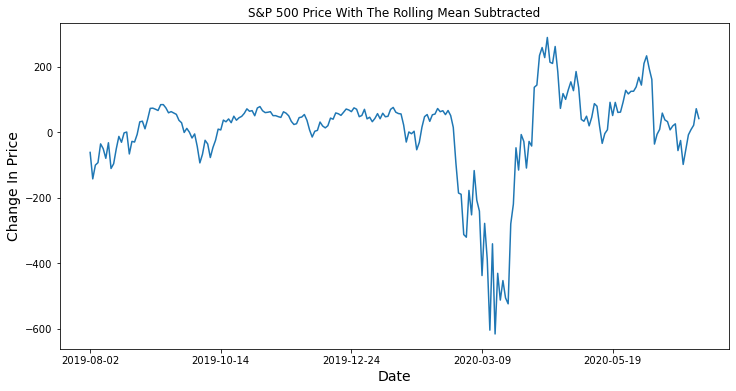

In [30]:
data_minus_rolmean.plot(figsize = (12,6))
plt.xlabel("Date", fontsize=14)
plt.ylabel("Change In Price", fontsize=14)
plt.title('S&P 500 Price With The Rolling Mean Subtracted')
plt.show()

In [31]:
stationarity_check(data_minus_rolmean)

Results of Dickey-Fuller Test:
Test Statistic                  -3.683672
p-value                          0.004349
#Lags Used                       9.000000
Number of Observations Used    224.000000
Critical Value (1%)             -3.459885
Critical Value (5%)             -2.874531
Critical Value (10%)            -2.573694
dtype: float64


### B) Weighted Rolling Mean

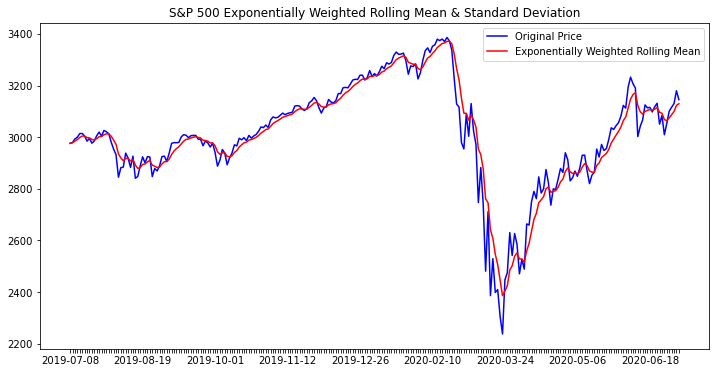

In [32]:
# Use Pandas ewma() to calculate Weighted Moving Average of ts_log
exp_rolmean = inx_df['adj_close'].ewm(halflife = 2).mean()

# Plot the original data with exp weighted average
fig, ax = plt.subplots(figsize=(12,6))
orig = plt.plot(inx_df['adj_close'], color='blue',label='Original Price')
mean = plt.plot(exp_rolmean, color='red', label='Exponentially Weighted Rolling Mean')

plt.legend(loc='best')
plt.title('S&P 500 Exponentially Weighted Rolling Mean & Standard Deviation')

#set cusom format of dates
ticklabels = inx_df.index
ax.xaxis.set_major_formatter(ticker.FixedFormatter(ticklabels))

#show only each 30th label, another are not visible
spacing = 30
visible = ax.xaxis.get_ticklabels()[::spacing]
for label in ax.xaxis.get_ticklabels():
    if label not in visible:
        label.set_visible(False)


plt.show(block=False)

In [33]:
# Subtract the moving average from the original data and check head for Nans
data_minus_exp_rolmean = inx_df['adj_close'] - exp_rolmean
data_minus_exp_rolmean.head(15)

date
2019-07-08     0.000000
2019-07-09     1.524306
2019-07-10     8.184251
2019-07-11     9.156916
2019-07-12    14.827767
2019-07-15    10.216983
2019-07-16    -0.029196
2019-07-17   -13.510405
2019-07-18    -1.956132
2019-07-19   -14.271397
2019-07-22    -4.098836
2019-07-23    11.478976
2019-07-24    17.996330
2019-07-25     1.484542
2019-07-26    16.701911
Name: adj_close, dtype: float64

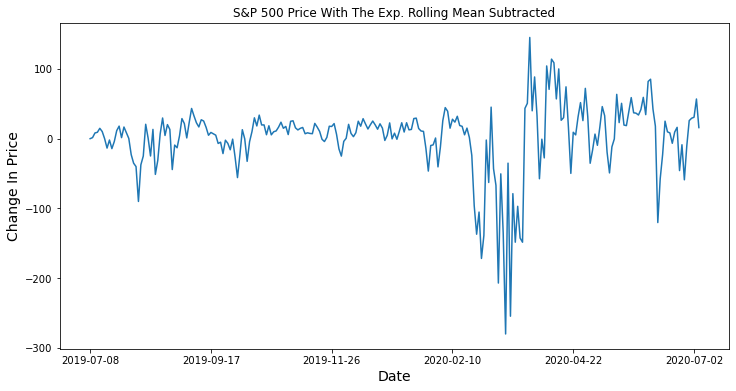

In [34]:
data_minus_exp_rolmean.plot(figsize = (12,6))
plt.xlabel("Date", fontsize=14)
plt.ylabel("Change In Price", fontsize=14)
plt.title('S&P 500 Price With The Exp. Rolling Mean Subtracted')
plt.show()

In [35]:
stationarity_check(data_minus_exp_rolmean)

Results of Dickey-Fuller Test:
Test Statistic                  -3.470689
p-value                          0.008773
#Lags Used                       9.000000
Number of Observations Used    243.000000
Critical Value (1%)             -3.457551
Critical Value (5%)             -2.873509
Critical Value (10%)            -2.573148
dtype: float64


## 3) Differencing

In [36]:
data_diff = inx_df['adj_close'].diff(periods=1)
data_diff.head(10)

date
2019-07-08      NaN
2019-07-09     3.68
2019-07-10    13.44
2019-07-11     6.84
2019-07-12    13.86
2019-07-15     0.53
2019-07-16   -10.26
2019-07-17   -19.62
2019-07-18    10.69
2019-07-19   -18.50
Name: adj_close, dtype: float64

In [37]:
data_diff.dropna(inplace=True)

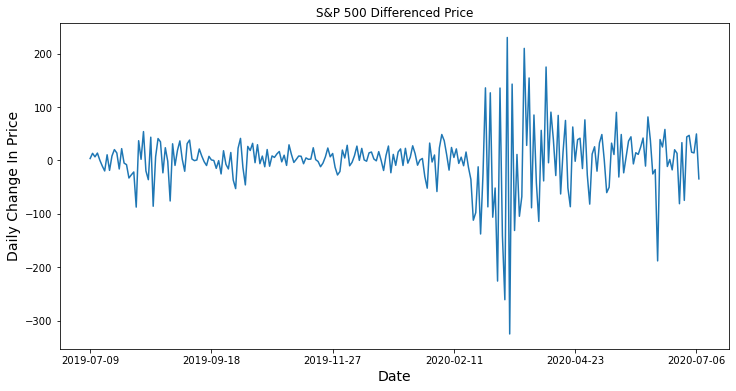

In [38]:
data_diff.plot(figsize = (12,6))
plt.xlabel("Date", fontsize=14)
plt.ylabel("Daily Change In Price", fontsize=14)
plt.title('S&P 500 Differenced Price')
plt.show(block=False)

In [39]:
stationarity_check(data_diff)

Results of Dickey-Fuller Test:
Test Statistic                  -3.934194
p-value                          0.001797
#Lags Used                       8.000000
Number of Observations Used    243.000000
Critical Value (1%)             -3.457551
Critical Value (5%)             -2.873509
Critical Value (10%)            -2.573148
dtype: float64


## 4) Time Series Decomposition

In [40]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [41]:
# Convert date index to datetime object
inx_df.index = pd.to_datetime(inx_df.index)

In [42]:
# frequency detection error: https://github.com/statsmodels/statsmodels/issues/3503
# decomposition = seasonal_decompose(inx_df['adj_close'])

In [45]:
#https://pandas.pydata.org/pandas-docs/version/0.23.4/generated/pandas.DatetimeIndex.html

## Old: print(pd.DatetimeIndex(inx_df['adj_close'], periods = 1).inferred_freq)
print(pd.DatetimeIndex(inx_df['adj_close']).inferred_freq)

None


## A) Additive Decomposition

### A.1) Frequency Set To 7 periods

In [46]:
# Obtain the three series

# frequency detection error: https://github.com/statsmodels/statsmodels/issues/3503
decomposition = seasonal_decompose(inx_df['adj_close'], model='additive', period = 7)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

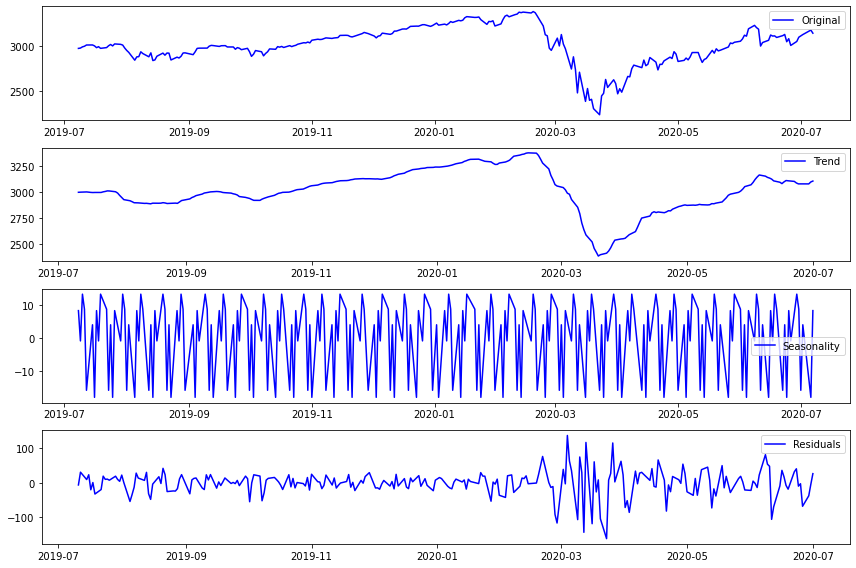

In [47]:
# Plot gathered statistics
plt.figure(figsize=(12,8))
plt.subplot(411)
plt.plot(inx_df['adj_close'], label='Original', color="blue")
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend', color="blue")
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality', color="blue")
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals', color="blue")
plt.legend(loc='best')
plt.tight_layout()

In [48]:
residual.dropna(inplace=True)

In [49]:
stationarity_check(residual)

Results of Dickey-Fuller Test:
Test Statistic                -7.128174e+00
p-value                        3.574769e-10
#Lags Used                     9.000000e+00
Number of Observations Used    2.370000e+02
Critical Value (1%)           -3.458247e+00
Critical Value (5%)           -2.873814e+00
Critical Value (10%)          -2.573311e+00
dtype: float64


### A.2) Frequency Set To 20 periods

In [50]:
# Obtain the three series

# frequency detection error: https://github.com/statsmodels/statsmodels/issues/3503
decomposition = seasonal_decompose(inx_df['adj_close'], model='additive', freq = 20)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

<ipython-input-50-63e6afd362c6>:4: FutureWarning:

the 'freq'' keyword is deprecated, use 'period' instead



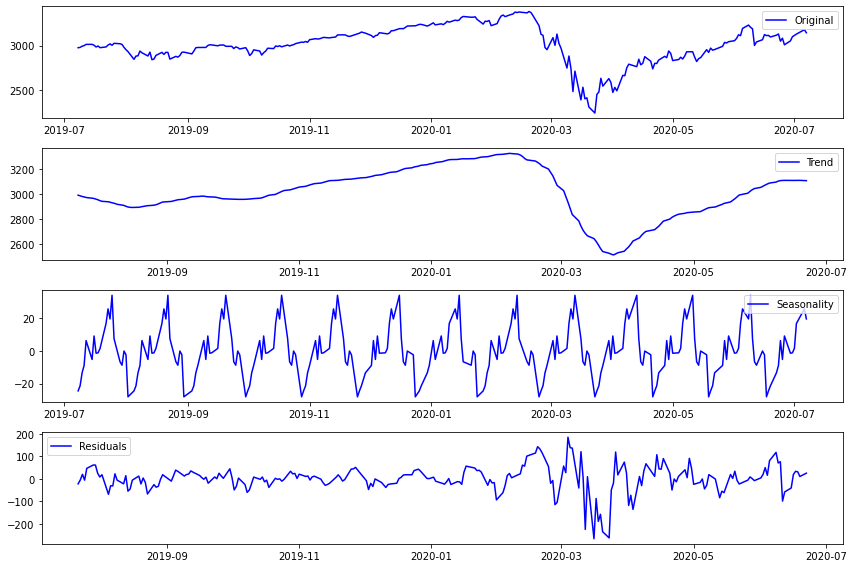

In [51]:
# Plot gathered statistics
plt.figure(figsize=(12,8))
plt.subplot(411)
plt.plot(inx_df['adj_close'], label='Original', color="blue")
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend', color="blue")
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality', color="blue")
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals', color="blue")
plt.legend(loc='best')
plt.tight_layout()

In [52]:
residual.dropna(inplace=True)

In [53]:
stationarity_check(residual)

Results of Dickey-Fuller Test:
Test Statistic                  -4.739540
p-value                          0.000071
#Lags Used                       9.000000
Number of Observations Used    223.000000
Critical Value (1%)             -3.460019
Critical Value (5%)             -2.874590
Critical Value (10%)            -2.573725
dtype: float64


### A.3) Frequency Set To 253 periods

In [54]:
# Obtain the three series

# frequency detection error: https://github.com/statsmodels/statsmodels/issues/3503
decomposition = seasonal_decompose(inx_df['adj_close'], model='additive', freq = 253)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

<ipython-input-54-ee1883016b21>:4: FutureWarning:

the 'freq'' keyword is deprecated, use 'period' instead



ValueError: x must have 2 complete cycles requires 506 observations. x only has 253 observation(s)

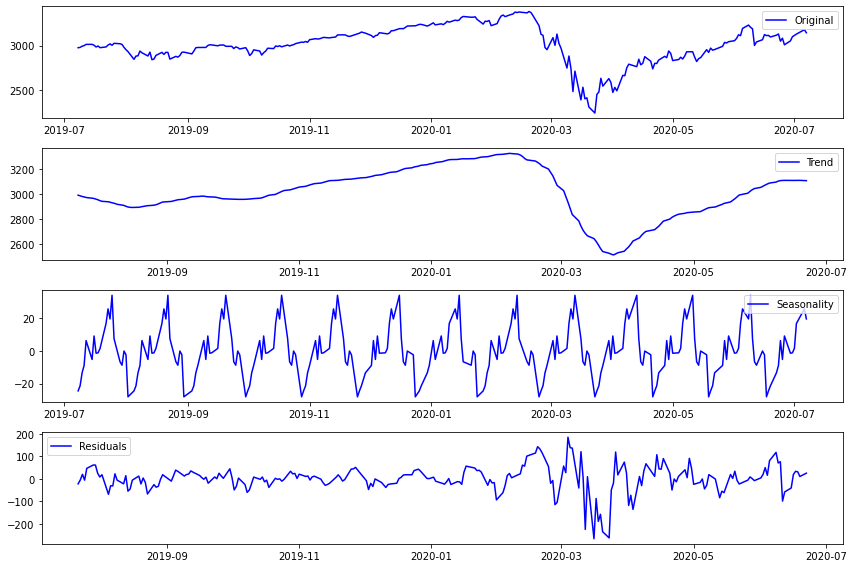

In [55]:
# Plot gathered statistics
plt.figure(figsize=(12,8))
plt.subplot(411)
plt.plot(inx_df['adj_close'], label='Original', color="blue")
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend', color="blue")
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality', color="blue")
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals', color="blue")
plt.legend(loc='best')
plt.tight_layout()

In [56]:
residual.dropna(inplace=True)

In [57]:
stationarity_check(residual)

Results of Dickey-Fuller Test:
Test Statistic                  -4.739540
p-value                          0.000071
#Lags Used                       9.000000
Number of Observations Used    223.000000
Critical Value (1%)             -3.460019
Critical Value (5%)             -2.874590
Critical Value (10%)            -2.573725
dtype: float64


## B) Multiplicative Decomposition

### B.1) Frequency Set To 7 periods

In [58]:
# Obtain the three series

# frequency detection error: https://github.com/statsmodels/statsmodels/issues/3503
decomposition = seasonal_decompose(inx_df['adj_close'], model='multiplicative', period = 7)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

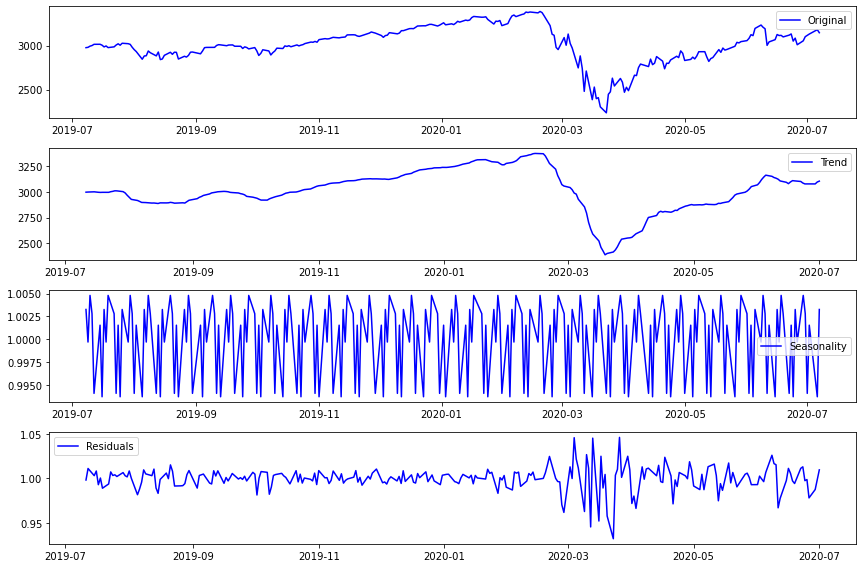

In [59]:
# Plot gathered statistics
plt.figure(figsize=(12,8))
plt.subplot(411)
plt.plot(inx_df['adj_close'], label='Original', color="blue")
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend', color="blue")
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality', color="blue")
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals', color="blue")
plt.legend(loc='best')
plt.tight_layout()

In [60]:
residual.dropna(inplace=True)

In [61]:
stationarity_check(residual)

Results of Dickey-Fuller Test:
Test Statistic                -6.973503e+00
p-value                        8.544783e-10
#Lags Used                     8.000000e+00
Number of Observations Used    2.380000e+02
Critical Value (1%)           -3.458128e+00
Critical Value (5%)           -2.873762e+00
Critical Value (10%)          -2.573283e+00
dtype: float64


### B.2) Frequency Set To 20 periods

In [62]:
# Obtain the three series

# frequency detection error: https://github.com/statsmodels/statsmodels/issues/3503
decomposition = seasonal_decompose(inx_df['adj_close'], model='multiplicative', freq = 20)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

<ipython-input-62-c8ea997bdae9>:4: FutureWarning:

the 'freq'' keyword is deprecated, use 'period' instead



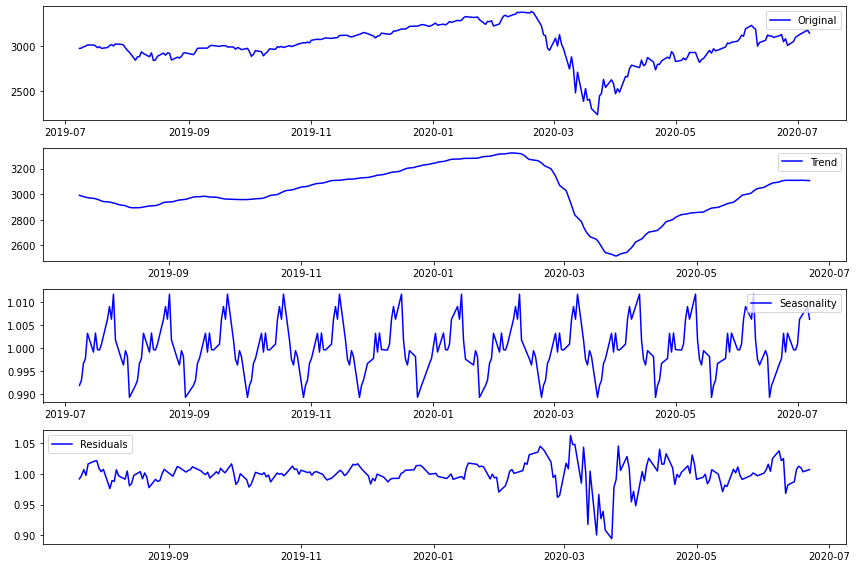

In [63]:
# Plot gathered statistics
plt.figure(figsize=(12,8))
plt.subplot(411)
plt.plot(inx_df['adj_close'], label='Original', color="blue")
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend', color="blue")
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality', color="blue")
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals', color="blue")
plt.legend(loc='best')
plt.tight_layout()

In [64]:
residual.dropna(inplace=True)

In [65]:
stationarity_check(residual)

Results of Dickey-Fuller Test:
Test Statistic                  -4.720399
p-value                          0.000077
#Lags Used                       9.000000
Number of Observations Used    223.000000
Critical Value (1%)             -3.460019
Critical Value (5%)             -2.874590
Critical Value (10%)            -2.573725
dtype: float64


### B.3) Frequency Set To 253 periods

In [66]:
# Obtain the three series

# frequency detection error: https://github.com/statsmodels/statsmodels/issues/3503
decomposition = seasonal_decompose(inx_df['adj_close'], model='multiplicative', freq = 253)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

<ipython-input-66-06bd4e6fc82f>:4: FutureWarning:

the 'freq'' keyword is deprecated, use 'period' instead



ValueError: x must have 2 complete cycles requires 506 observations. x only has 253 observation(s)

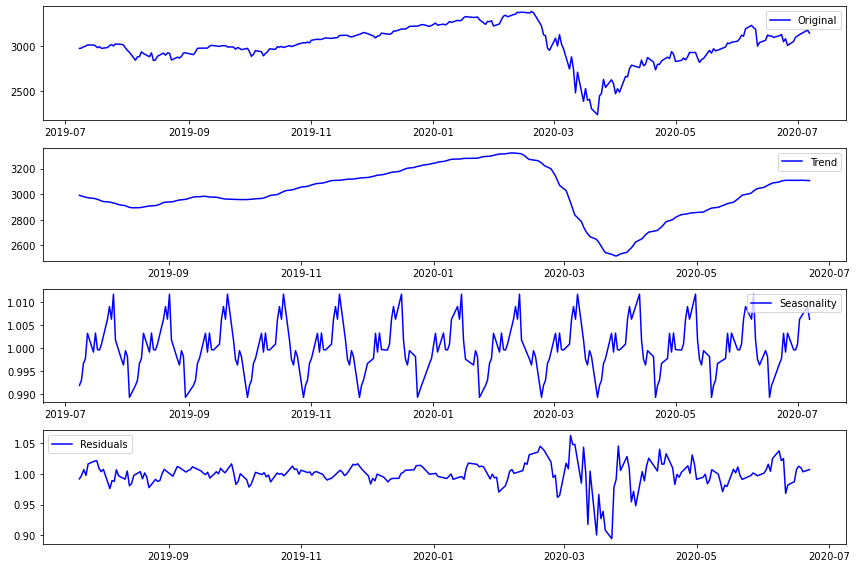

In [67]:
# Plot gathered statistics
plt.figure(figsize=(12,8))
plt.subplot(411)
plt.plot(inx_df['adj_close'], label='Original', color="blue")
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend', color="blue")
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality', color="blue")
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals', color="blue")
plt.legend(loc='best')
plt.tight_layout()

In [68]:
residual.dropna(inplace=True)

In [69]:
stationarity_check(residual)

Results of Dickey-Fuller Test:
Test Statistic                  -4.720399
p-value                          0.000077
#Lags Used                       9.000000
Number of Observations Used    223.000000
Critical Value (1%)             -3.460019
Critical Value (5%)             -2.874590
Critical Value (10%)            -2.573725
dtype: float64
